# runme

By running this notebook, all the required graphs and tables can be shown.

In [1]:
from gibbsSampler import Gibbs, posteriorDistGaussian, plot_histogram, plot_skills
from densityFiltering import show_table, dataProcess
from prediction import show_prediction_table
from messagePassing import plot_messageGibbs
import pandas as pd
import numpy as np
from time import perf_counter as pc
from IPython.display import display
import matplotlib.pyplot as plt

## Q.5

In this queston, we first plot the sampled skills for each player and outcome t, 
for different values of L(lenght of sample sequence), and then plot the histogram of skills
for each player toghether with the approximated distribution for the players skill, and measure the
computation time for that L.

Choice of hyperparameters:
m1 = 1  # prior mean skill of player 1
s1 = 0.5 # prior variance of skill of player 1

m2 = 1  # prior mean skill of player 2
s2 = 0.5  # prior variance of skill of player 1

m_t = m1-m2. # mean of outcome t
s_t = 2  # variance of outcome t 

y = 1. # match result

## 1. Sample plots

In [2]:
def plot1(L):        
    s, t = Gibbs(L, y=1)
    s, t = plot_skills(L, s, t)

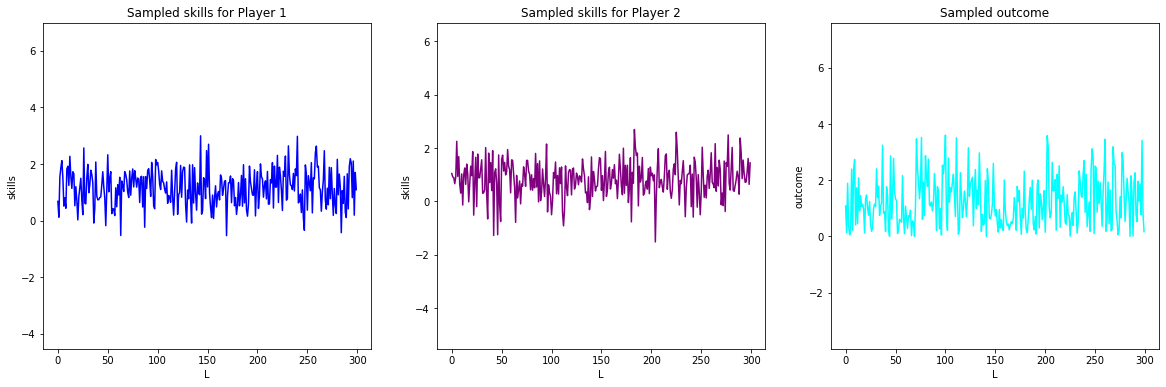

In [3]:
plot1(L=300)

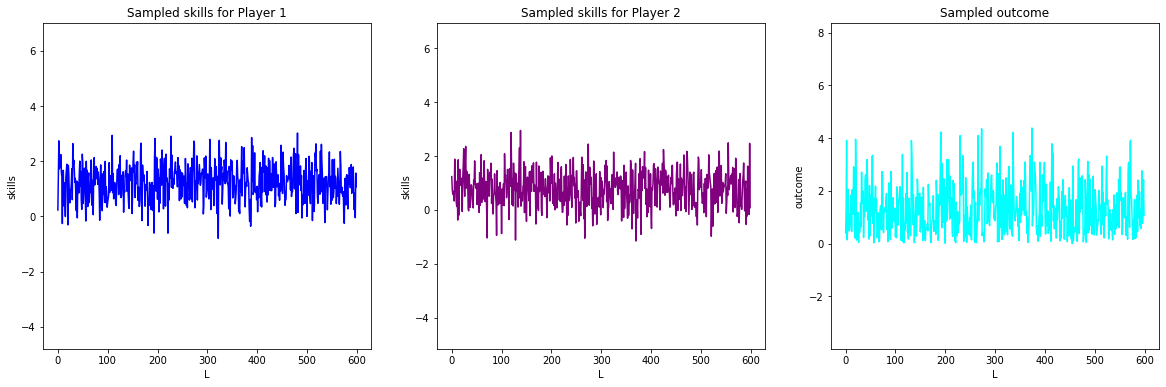

In [4]:
plot1(L=600)

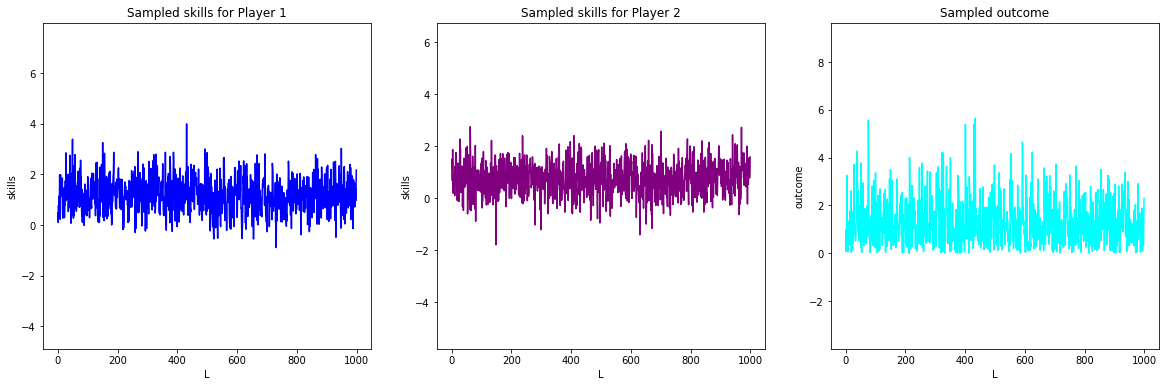

In [5]:
plot1(L=1000)

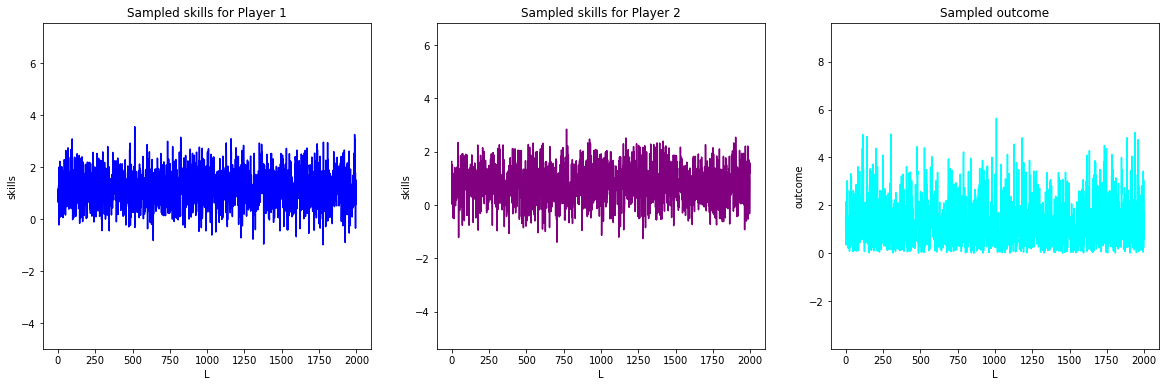

In [6]:
plot1(L=2000)

## 2. Histograms 

In [8]:
def hist(L):
    time1 = pc()
    s, t = Gibbs(L, y=1)
    time2 = pc()
    print(f"Computation time of sampling for a sequence length of {L}: {round(time2-time1, 2)}s")

    plot_histogram(s)

### *** L = 100

Computation time of sampling for a sequence length of 100: 0.1s


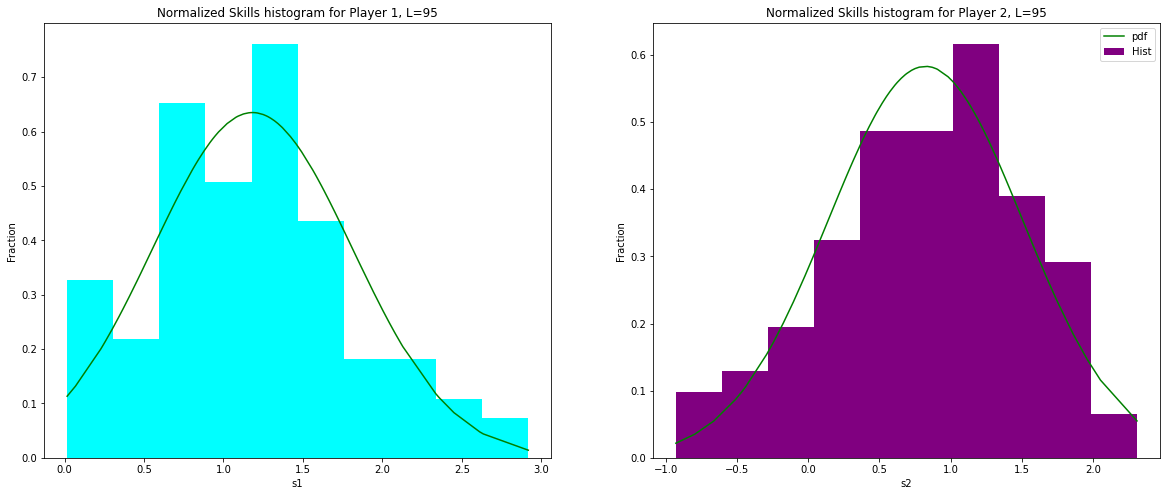

In [9]:
hist(L=100)

### *** L = 500

Computation time of sampling for a sequence length of 500: 0.27s


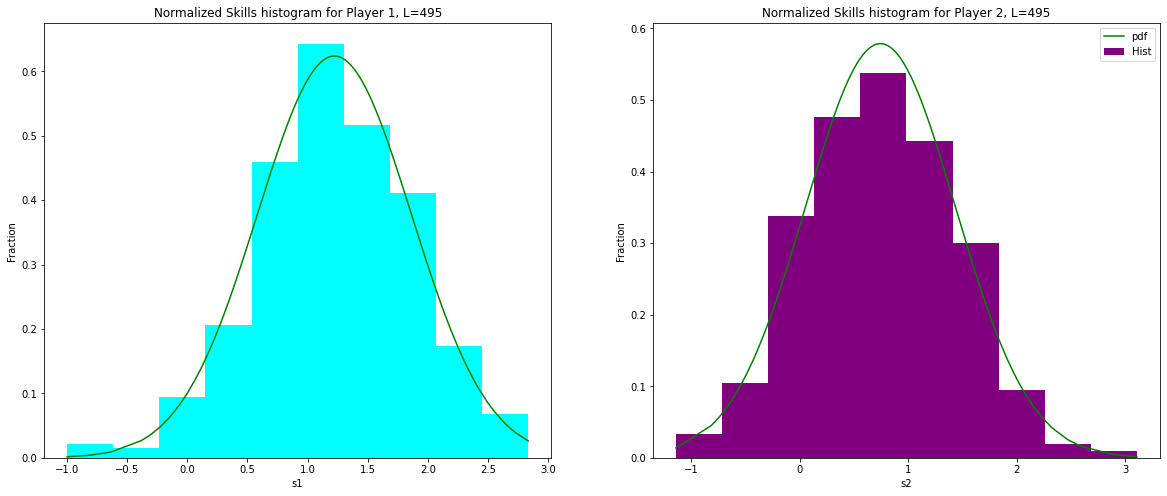

In [10]:
hist(L=500)

### *** L = 1000

Computation time of sampling for a sequence length of 1000: 0.47s


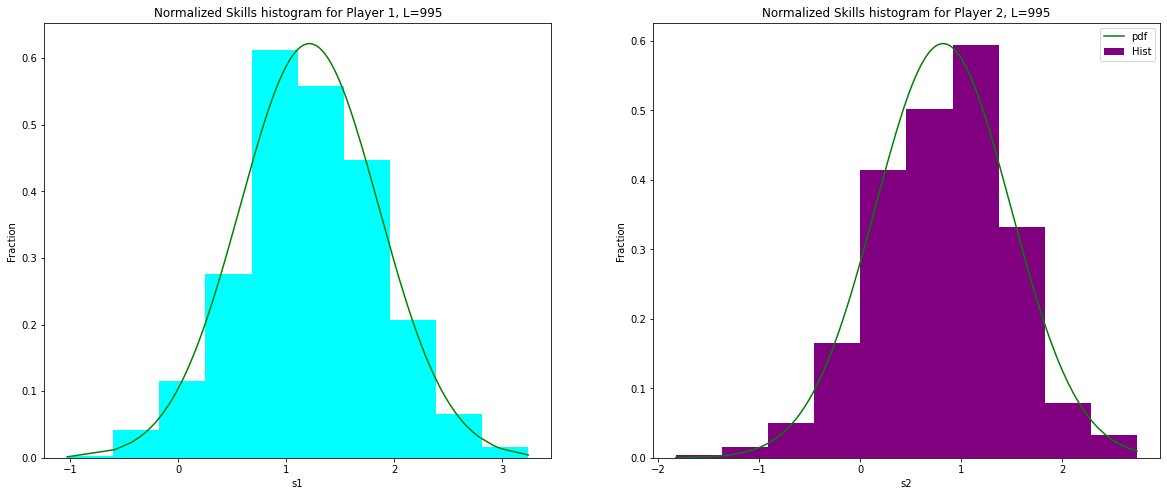

In [11]:
hist(L=1000)

### *** L = 1500

Computation time of sampling for a sequence length of 1500: 0.75s


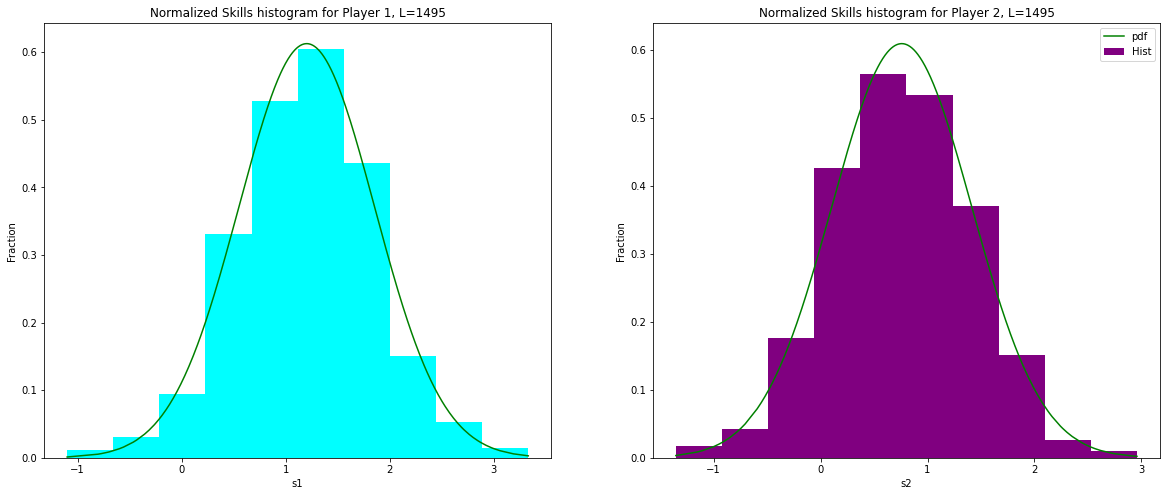

In [12]:
hist(L=1500)

### *** L = 2000

Computation time of sampling for a sequence length of 2000: 0.95s


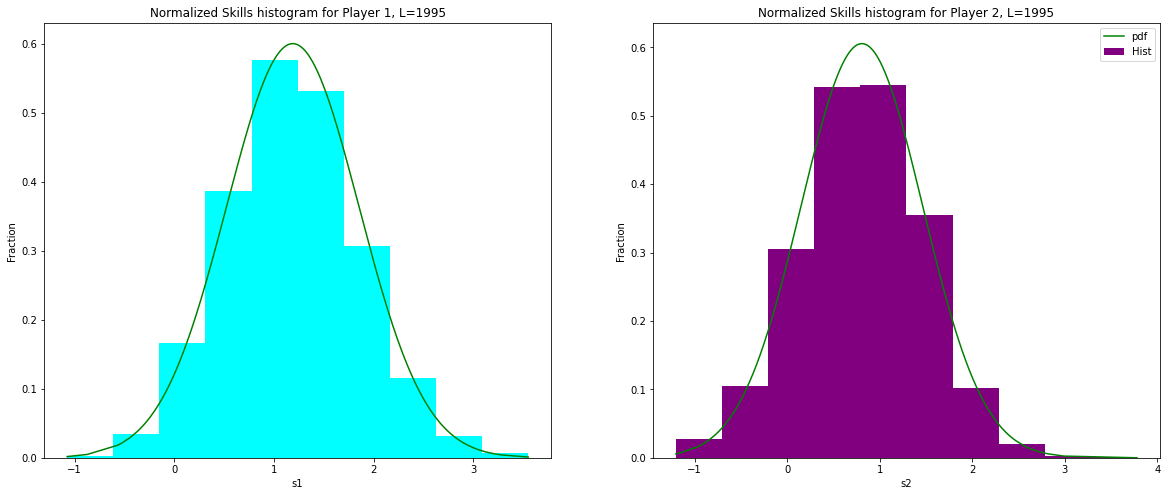

In [13]:
hist(L=2000)

### *** Conclusion

Based on the histograms above, the higher the value of L, the better the the samples and approximated distribution,
but so does the computation time increase. Considering L=2000 took ~ 1.0s for one match, processing the whole
SerieA dataset matches may take several minutes, which is an accepted solution time. Hence we choose L=2000.

## Q.6 | Q.7

Here we find the ranks of each teams, based on the matches they play with each other, where for each match we have
a prior belief of each players mean skill and variance, and use Gibbs sampling to find the posterior skills of each
of them, then update their means and variances, and use that as a prior in their respective next matches.

The first table is the ranks for the original data, while in the second table the order of the matches are shuffled.

Then, we can perform prediction of each match result before it is played, and use sampling after that to update
the priors.

### *** Ranks

In [5]:
def ranks(data, improvement=False):
    t1 = pc()
    show_table(data=data, improvement=improvement)  # original order of matches
    t2 = pc()
    print(f"Computation time to process 272 matches: {round(t2-t1,2)}s\n")

    show_table(data=data, randomize=True)  # reordered matches

In [3]:
ranks(data='SerieA.csv')

Range of variances: [0.08237061617179628, 0.14512052241652962]


,Teams,Mean,Variance
0,Juventus,2.108060,0.139013
1,Napoli,1.796952,0.083834
2,Milan,1.587252,0.102304
3,Atalanta,1.556983,0.097510
4,Inter,1.502176,0.107705
5,Torino,1.498081,0.145121
6,Roma,1.470914,0.100649
7,Lazio,1.270547,0.082371
8,Sampdoria,0.969829,0.096796
9,Sassuolo,0.771184,0.130089


Computation time to process 272 matches: 259.0s

Range of variances: [0.08413467151855007, 0.14721324121112117]


,Teams,Mean,Variance
0,Juventus,2.233101,0.107771
1,Napoli,1.933784,0.106781
2,Roma,1.615803,0.106077
3,Inter,1.587550,0.084135
4,Atalanta,1.555424,0.089654
5,Milan,1.542406,0.096822
6,Torino,1.496087,0.108949
7,Lazio,1.196106,0.094055
8,Sampdoria,1.120016,0.086627
9,Udinese,0.764410,0.108461


The two tables show that changing the order of the matches does not have a remarkable effect, but rather the small difference between the two tables can be explained away by the randomness of the sampling.

### *** Predictions

In [3]:
def preds(data, improvement=False):
    t1 = pc()
    accuracy, data = show_prediction_table(data=data, improvement=improvement)
    t2 = pc()
    print(f"\nPrediction computation time is: {round(t2-t1, 2)}s")
    display(data)
    return round(accuracy, 2)

In [12]:
accuracies = []
for _ in range(5):
    accuracy = preds(data = 'SerieA.csv')
    accuracies.append(accuracy)
print(f"The acuuracies of 5 runs: {accuracies}")
print(f"Average accuracy: {np.mean(accuracies)}")

The accuracy of this model is: 0.66

Prediction computation time is: 221.82s


,team1,team2,y,prediction
0,Chievo,Juventus,-1,1.0
1,Lazio,Napoli,-1,1.0
2,Torino,Roma,-1,1.0
3,Sassuolo,Inter,1,1.0
5,Empoli,Cagliari,1,1.0
...,...,...,...,...
374,Spal,Milan,-1,-1.0
375,Roma,Parma,1,1.0
376,Inter,Empoli,1,1.0
378,Cagliari,Udinese,-1,1.0


The accuracy of this model is: 0.66

Prediction computation time is: 230.75s


,team1,team2,y,prediction
0,Chievo,Juventus,-1,1.0
1,Lazio,Napoli,-1,1.0
2,Torino,Roma,-1,1.0
3,Sassuolo,Inter,1,1.0
5,Empoli,Cagliari,1,1.0
...,...,...,...,...
374,Spal,Milan,-1,-1.0
375,Roma,Parma,1,1.0
376,Inter,Empoli,1,1.0
378,Cagliari,Udinese,-1,1.0


The accuracy of this model is: 0.66

Prediction computation time is: 224.53s


,team1,team2,y,prediction
0,Chievo,Juventus,-1,1.0
1,Lazio,Napoli,-1,1.0
2,Torino,Roma,-1,1.0
3,Sassuolo,Inter,1,1.0
5,Empoli,Cagliari,1,1.0
...,...,...,...,...
374,Spal,Milan,-1,-1.0
375,Roma,Parma,1,1.0
376,Inter,Empoli,1,1.0
378,Cagliari,Udinese,-1,-1.0


The accuracy of this model is: 0.67

Prediction computation time is: 219.78s


,team1,team2,y,prediction
0,Chievo,Juventus,-1,1.0
1,Lazio,Napoli,-1,1.0
2,Torino,Roma,-1,1.0
3,Sassuolo,Inter,1,1.0
5,Empoli,Cagliari,1,1.0
...,...,...,...,...
374,Spal,Milan,-1,-1.0
375,Roma,Parma,1,1.0
376,Inter,Empoli,1,1.0
378,Cagliari,Udinese,-1,1.0


The accuracy of this model is: 0.65

Prediction computation time is: 235.1s


,team1,team2,y,prediction
0,Chievo,Juventus,-1,1.0
1,Lazio,Napoli,-1,1.0
2,Torino,Roma,-1,1.0
3,Sassuolo,Inter,1,1.0
5,Empoli,Cagliari,1,1.0
...,...,...,...,...
374,Spal,Milan,-1,-1.0
375,Roma,Parma,1,1.0
376,Inter,Empoli,1,1.0
378,Cagliari,Udinese,-1,1.0


The acuuracies of 5 runs: [0.6617647058823529, 0.6617647058823529, 0.6580882352941176, 0.6654411764705882, 0.6470588235294118]
Average accuracy: 0.6588235294117647


### ***Extensions

Using the scores, home city advantage as well as number of wins as a way of improving the model, we rank the teams again:


In [7]:
ranks(data='SerieA.csv', improvement=True)

Range of variances: [0.12868814655605668, 0.22115403081589627]


,Teams,Mean,Variance,Wins
0,Napoli,32.121176,0.150964,24
1,Juventus,30.128511,0.138225,28
2,Atalanta,28.546385,0.138351,20
3,Inter,19.730781,0.171298,20
4,Milan,19.194211,0.216568,19
5,Roma,15.501230,0.151713,18
6,Torino,13.619338,0.152896,16
7,Lazio,5.962613,0.135356,17
8,Sampdoria,5.733953,0.134798,15
9,Bologna,2.418196,0.155598,11


Computation time to process 272 matches: 224.55s

Range of variances: [0.0880010680870626, 0.1400574171934969]


,Teams,Mean,Variance
0,Juventus,2.261584,0.119766
1,Napoli,1.932310,0.108571
2,Milan,1.676620,0.118115
3,Roma,1.567661,0.118634
4,Inter,1.558416,0.094078
5,Atalanta,1.534234,0.110709
6,Torino,1.480277,0.116800
7,Lazio,1.259290,0.088001
8,Sampdoria,1.058075,0.095493
9,Bologna,0.863619,0.093189


Computing the predictions again using the improvement=True:

In [4]:
accuracies = []
for _ in range(5):
    accuracy = preds(data = 'SerieA.csv', improvement=True)
    accuracies.append(accuracy)
print(f"The acuuracies of 5 runs: {accuracies}")
print(f"Average accuracy: {np.mean(accuracies)}")

The accuracy of this model is: 0.69

Prediction computation time is: 253.56s


,team1,team2,score1,score2,y,prediction
0,Chievo,Juventus,2,3,-1,1.0
1,Lazio,Napoli,1,2,-1,1.0
2,Torino,Roma,0,1,-1,1.0
3,Sassuolo,Inter,1,0,1,1.0
5,Empoli,Cagliari,2,0,1,1.0
...,...,...,...,...,...,...
374,Spal,Milan,2,3,-1,-1.0
375,Roma,Parma,2,1,1,1.0
376,Inter,Empoli,2,1,1,1.0
378,Cagliari,Udinese,1,2,-1,1.0


The accuracy of this model is: 0.69

Prediction computation time is: 233.12s


,team1,team2,score1,score2,y,prediction
0,Chievo,Juventus,2,3,-1,1.0
1,Lazio,Napoli,1,2,-1,1.0
2,Torino,Roma,0,1,-1,1.0
3,Sassuolo,Inter,1,0,1,1.0
5,Empoli,Cagliari,2,0,1,1.0
...,...,...,...,...,...,...
374,Spal,Milan,2,3,-1,-1.0
375,Roma,Parma,2,1,1,1.0
376,Inter,Empoli,2,1,1,1.0
378,Cagliari,Udinese,1,2,-1,1.0


The accuracy of this model is: 0.69

Prediction computation time is: 232.16s


,team1,team2,score1,score2,y,prediction
0,Chievo,Juventus,2,3,-1,1.0
1,Lazio,Napoli,1,2,-1,1.0
2,Torino,Roma,0,1,-1,1.0
3,Sassuolo,Inter,1,0,1,1.0
5,Empoli,Cagliari,2,0,1,1.0
...,...,...,...,...,...,...
374,Spal,Milan,2,3,-1,-1.0
375,Roma,Parma,2,1,1,1.0
376,Inter,Empoli,2,1,1,1.0
378,Cagliari,Udinese,1,2,-1,1.0


The accuracy of this model is: 0.69

Prediction computation time is: 228.82s


,team1,team2,score1,score2,y,prediction
0,Chievo,Juventus,2,3,-1,1.0
1,Lazio,Napoli,1,2,-1,1.0
2,Torino,Roma,0,1,-1,1.0
3,Sassuolo,Inter,1,0,1,1.0
5,Empoli,Cagliari,2,0,1,1.0
...,...,...,...,...,...,...
374,Spal,Milan,2,3,-1,-1.0
375,Roma,Parma,2,1,1,1.0
376,Inter,Empoli,2,1,1,1.0
378,Cagliari,Udinese,1,2,-1,1.0


The accuracy of this model is: 0.69

Prediction computation time is: 223.73s


,team1,team2,score1,score2,y,prediction
0,Chievo,Juventus,2,3,-1,1.0
1,Lazio,Napoli,1,2,-1,1.0
2,Torino,Roma,0,1,-1,1.0
3,Sassuolo,Inter,1,0,1,1.0
5,Empoli,Cagliari,2,0,1,1.0
...,...,...,...,...,...,...
374,Spal,Milan,2,3,-1,-1.0
375,Roma,Parma,2,1,1,1.0
376,Inter,Empoli,2,1,1,1.0
378,Cagliari,Udinese,1,2,-1,1.0


The acuuracies of 5 runs: [0.69, 0.69, 0.69, 0.69, 0.69]
Average accuracy: 0.69


In [19]:
realRanks = ['Juventus', 'Napoli', 'Atalanta', 'Inter Milan', 'Milan', 'Roma', 'Torino', 'Lazio', 'Sampdoria', 'Bologna', 'Sassuolo', \
            'Udinese', 'SPAL', 'Parma', 'Cagliari', 'Fiorentina', 'Genoa', 'Empoli', 'Frosinone', 'Chievo']
realRankTable = pd.DataFrame()
realRankTable["Team"] = realRanks
realRankTable

,Team
0,Juventus
1,Napoli
2,Atalanta
3,Inter Milan
4,Milan
5,Roma
6,Torino
7,Lazio
8,Sampdoria
9,Bologna


## Q.9 

This figure is a comparision between the fitted Gaussian obtained from message passing versus the histogram and fitted Gaussian obtained from Gibbs sampling.

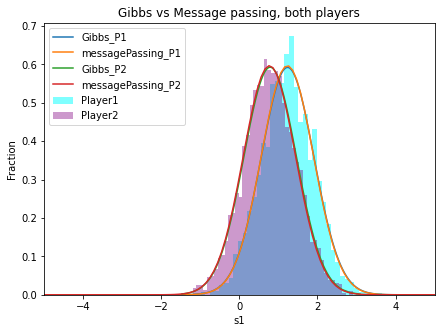

In [2]:
plot_messageGibbs()

## Q.10

Here we use a new dataset to test our model. Source: https://www.kaggle.com/hellbuoy/pro-kabaddi-2019/version/1?select=2019_Pro_Kabaddi.xlsx

In [9]:
prokabadi_rank = pd.read_csv('Points Table_2019-Table 1.csv')
prokabadi_matches = pd.read_csv('2019_Team Score-Table 1.csv')

In [10]:
prokabadi_matches

,Week,Team_1,Team_2,Team 1_Score,Team 2_Score,Winner,MarginScore
0,Week 1,Telugu Titans,U Mumba,25,31,U Mumba,-6
1,Week 1,Bengaluru Bulls,Patna Pirates,34,32,Bengaluru Bulls,2
2,Week 1,Bengaluru Bulls,Fortune Giants,24,42,Fortune Giants,-18
3,Week 1,Telugu Titans,Tamil Thalaivas,26,39,Tamil Thalaivas,-13
4,Week 1,U Mumba,Pink Panthers,23,42,Pink Panthers,-19
...,...,...,...,...,...,...,...
110,Week 11,Fortune Giants,Tamil Thalaivas,50,21,Fortune Giants,29
111,Week 11,Puneri Paltan,Dabang Delhi,40,60,Dabang Delhi,-20
112,Week 11,Haryana Steelers,Fortune Giants,38,37,Haryana Steelers,1
113,Week 11,Dabang Delhi,Bengal Warriors,33,42,Bengal Warriors,-9


In [11]:
prokabadi_rank

,Team,Played,WINS,LOSSES,DRAWS,Score Diff,Points
0,Dabang Delhi,20,15,3,2,92,82
1,Bengal Warriors,20,13,4,3,86,78
2,Haryana Steelers,19,12,6,1,24,65
3,U Mumba,19,10,8,1,33,59
4,Bengaluru Bulls,19,10,8,1,12,58
5,UP Yoddha,18,10,6,2,-19,58
6,Pink Panthers,20,8,10,2,-18,52
7,Puneri Paltan,20,6,11,3,-71,42
8,Patna Pirates,19,6,12,1,-1,40
9,Fortune Giants,20,6,12,2,14,45


Process the data so that the column names are identical to that of the 'SerieA' dataset.

In [12]:
data, rank = dataProcess('Kabaddi', True)

In [13]:
data

,team1,team2,score1,score2,y
0,Telugu Titans,U Mumba,25,31,-1
1,Bengaluru Bulls,Patna Pirates,34,32,1
2,Bengaluru Bulls,Fortune Giants,24,42,-1
3,Telugu Titans,Tamil Thalaivas,26,39,-1
4,U Mumba,Pink Panthers,23,42,-1
...,...,...,...,...,...
110,Fortune Giants,Tamil Thalaivas,50,21,1
111,Puneri Paltan,Dabang Delhi,40,60,-1
112,Haryana Steelers,Fortune Giants,38,37,1
113,Dabang Delhi,Bengal Warriors,33,42,-1


In [14]:
prokabadi_rank

,Team,Played,WINS,LOSSES,DRAWS,Score Diff,Points
0,Dabang Delhi,20,15,3,2,92,82
1,Bengal Warriors,20,13,4,3,86,78
2,Haryana Steelers,19,12,6,1,24,65
3,U Mumba,19,10,8,1,33,59
4,Bengaluru Bulls,19,10,8,1,12,58
5,UP Yoddha,18,10,6,2,-19,58
6,Pink Panthers,20,8,10,2,-18,52
7,Puneri Paltan,20,6,11,3,-71,42
8,Patna Pirates,19,6,12,1,-1,40
9,Fortune Giants,20,6,12,2,14,45


In [15]:
ranks(data = 'Kabaddi')

Range of variances: [0.12307622649492299, 0.1663937222511407]


,Teams,Mean,Variance
0,Dabang Delhi,1.769791,0.151030
1,Bengal Warriors,1.614383,0.151376
2,Haryana Steelers,1.526762,0.131594
3,UP Yoddha,1.339729,0.139928
4,U Mumba,1.216402,0.134379
5,Bengaluru Bulls,1.041694,0.127758
6,Pink Panthers,0.830022,0.148865
7,Telugu Titans,0.817766,0.166394
8,Puneri Paltan,0.689266,0.156914
9,Fortune Giants,0.628844,0.123076


Computation time to process 272 matches: 96.28s

Range of variances: [0.11843289537640303, 0.17789128280863073]


,Teams,Mean,Variance
0,Bengal Warriors,1.702557,0.134990
1,Dabang Delhi,1.609215,0.141664
2,Haryana Steelers,1.391404,0.143248
3,UP Yoddha,1.356886,0.173747
4,U Mumba,1.195161,0.139292
5,Bengaluru Bulls,1.084790,0.118433
6,Pink Panthers,0.869608,0.136892
7,Telugu Titans,0.768318,0.153821
8,Puneri Paltan,0.709709,0.157644
9,Fortune Giants,0.641572,0.144871


In [16]:
accuracies = []
for _ in range(5):
    accuracy = preds(data = 'Kabaddi', improvement=True)
    accuracies.append(accuracy)
print(f"The acuuracies of 5 runs: {accuracies}")
print(f"Average accuracy: {np.mean(accuracies)}")

The accuracy of this model is: 0.52

Prediction computation time is: 109.79s


,team1,team2,score1,score2,y,prediction
0,Telugu Titans,U Mumba,25,31,-1,1.0
1,Bengaluru Bulls,Patna Pirates,34,32,1,1.0
2,Bengaluru Bulls,Fortune Giants,24,42,-1,1.0
3,Telugu Titans,Tamil Thalaivas,26,39,-1,-1.0
4,U Mumba,Pink Panthers,23,42,-1,1.0
...,...,...,...,...,...,...
110,Fortune Giants,Tamil Thalaivas,50,21,1,1.0
111,Puneri Paltan,Dabang Delhi,40,60,-1,-1.0
112,Haryana Steelers,Fortune Giants,38,37,1,1.0
113,Dabang Delhi,Bengal Warriors,33,42,-1,1.0


The accuracy of this model is: 0.51

Prediction computation time is: 96.83s


,team1,team2,score1,score2,y,prediction
0,Telugu Titans,U Mumba,25,31,-1,1.0
1,Bengaluru Bulls,Patna Pirates,34,32,1,1.0
2,Bengaluru Bulls,Fortune Giants,24,42,-1,1.0
3,Telugu Titans,Tamil Thalaivas,26,39,-1,-1.0
4,U Mumba,Pink Panthers,23,42,-1,1.0
...,...,...,...,...,...,...
110,Fortune Giants,Tamil Thalaivas,50,21,1,1.0
111,Puneri Paltan,Dabang Delhi,40,60,-1,-1.0
112,Haryana Steelers,Fortune Giants,38,37,1,1.0
113,Dabang Delhi,Bengal Warriors,33,42,-1,1.0


The accuracy of this model is: 0.52

Prediction computation time is: 98.53s


,team1,team2,score1,score2,y,prediction
0,Telugu Titans,U Mumba,25,31,-1,1.0
1,Bengaluru Bulls,Patna Pirates,34,32,1,1.0
2,Bengaluru Bulls,Fortune Giants,24,42,-1,1.0
3,Telugu Titans,Tamil Thalaivas,26,39,-1,-1.0
4,U Mumba,Pink Panthers,23,42,-1,1.0
...,...,...,...,...,...,...
110,Fortune Giants,Tamil Thalaivas,50,21,1,1.0
111,Puneri Paltan,Dabang Delhi,40,60,-1,-1.0
112,Haryana Steelers,Fortune Giants,38,37,1,1.0
113,Dabang Delhi,Bengal Warriors,33,42,-1,1.0


The accuracy of this model is: 0.52

Prediction computation time is: 94.11s


,team1,team2,score1,score2,y,prediction
0,Telugu Titans,U Mumba,25,31,-1,1.0
1,Bengaluru Bulls,Patna Pirates,34,32,1,1.0
2,Bengaluru Bulls,Fortune Giants,24,42,-1,1.0
3,Telugu Titans,Tamil Thalaivas,26,39,-1,-1.0
4,U Mumba,Pink Panthers,23,42,-1,1.0
...,...,...,...,...,...,...
110,Fortune Giants,Tamil Thalaivas,50,21,1,1.0
111,Puneri Paltan,Dabang Delhi,40,60,-1,-1.0
112,Haryana Steelers,Fortune Giants,38,37,1,1.0
113,Dabang Delhi,Bengal Warriors,33,42,-1,1.0


The accuracy of this model is: 0.52

Prediction computation time is: 95.77s


,team1,team2,score1,score2,y,prediction
0,Telugu Titans,U Mumba,25,31,-1,1.0
1,Bengaluru Bulls,Patna Pirates,34,32,1,1.0
2,Bengaluru Bulls,Fortune Giants,24,42,-1,1.0
3,Telugu Titans,Tamil Thalaivas,26,39,-1,-1.0
4,U Mumba,Pink Panthers,23,42,-1,1.0
...,...,...,...,...,...,...
110,Fortune Giants,Tamil Thalaivas,50,21,1,1.0
111,Puneri Paltan,Dabang Delhi,40,60,-1,-1.0
112,Haryana Steelers,Fortune Giants,38,37,1,1.0
113,Dabang Delhi,Bengal Warriors,33,42,-1,1.0


The acuuracies of 5 runs: [0.52, 0.51, 0.52, 0.52, 0.52]
Average accuracy: 0.518
